In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency, pearsonr

In [3]:
#load data
file_path = '/content/drive/MyDrive/lone/Loan 2.csv'
data = pd.read_csv(file_path)

# display the first few rows of the data
print("First few rows of the data:")
print(data.head())

First few rows of the data:
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of 

In [4]:
# Numerical vs. Numerical: Correlation and Scatter Plot
Numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\ncorrelation between numerical features:")
Correlation_matrix = data[Numerical_columns].corr()
print(Correlation_matrix)


correlation between numerical features:
                                  Age  Income (USD)  \
Age                          1.000000     -0.010201   
Income (USD)                -0.010201      1.000000   
Loan Amount Request (USD)   -0.010450      0.050371   
Current Loan Expenses (USD) -0.023684      0.055080   
Dependents                  -0.083454      0.005170   
Credit Score                 0.129760      0.012911   
No. of Defaults              0.003573     -0.002141   
Property ID                 -0.012358     -0.008139   
Property Age                -0.010341      1.000000   
Property Type                0.002196      0.009733   
Co-Applicant                 0.000632      0.000469   
Property Price              -0.009819      0.050679   
Loan Sanction Amount (USD)   0.008112      0.038157   

                             Loan Amount Request (USD)  \
Age                                          -0.010450   
Income (USD)                                  0.050371   
Loan Amount Re

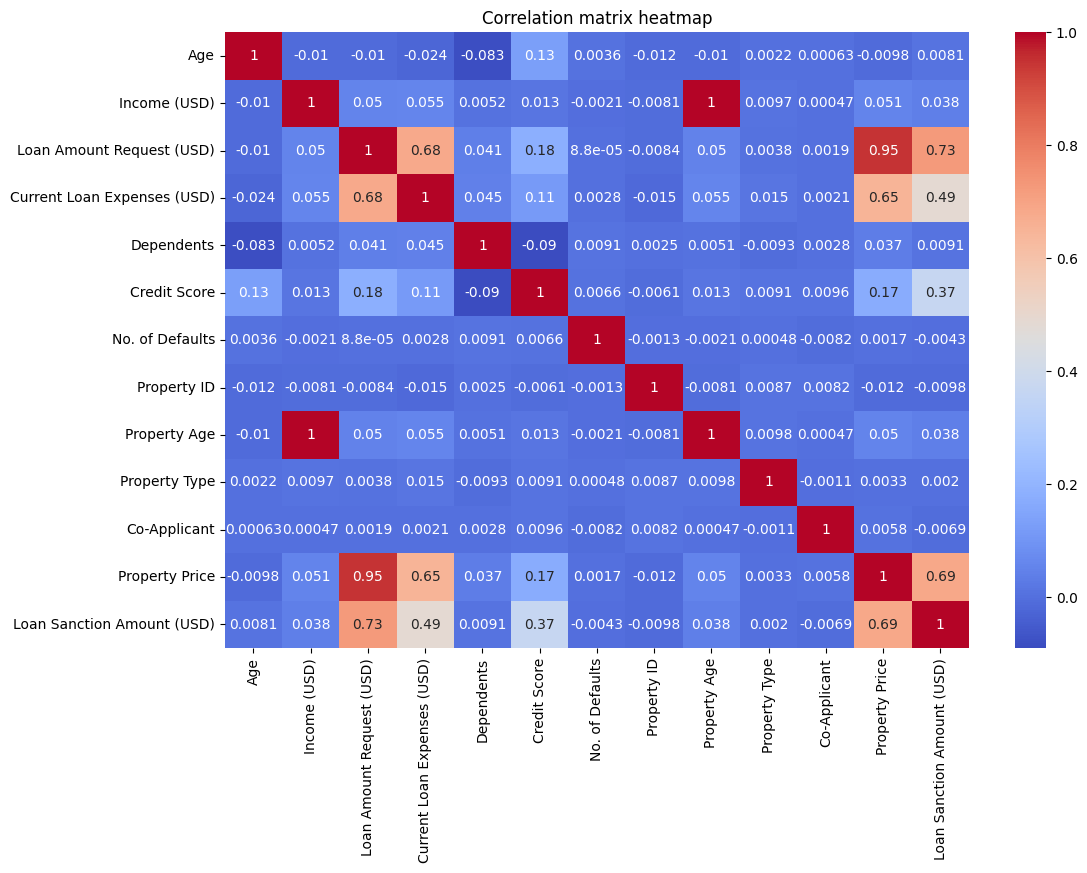

In [7]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

In [9]:
# Scatter plot for each pair of numerical features
for i, column1 in enumerate(Numerical_columns):
    for column2 in Numerical_columns[i+1:]:
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=column1, y=column2, data=data)
        plt.title(f'Scatter Plot between {column1} and {column2}')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

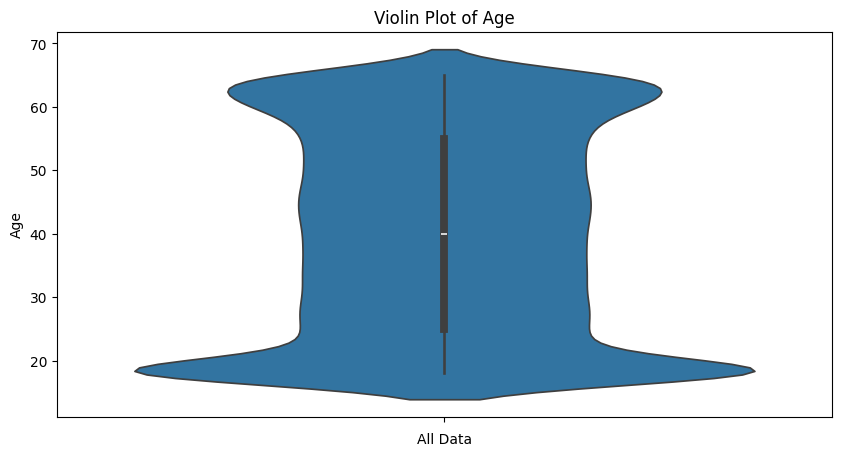

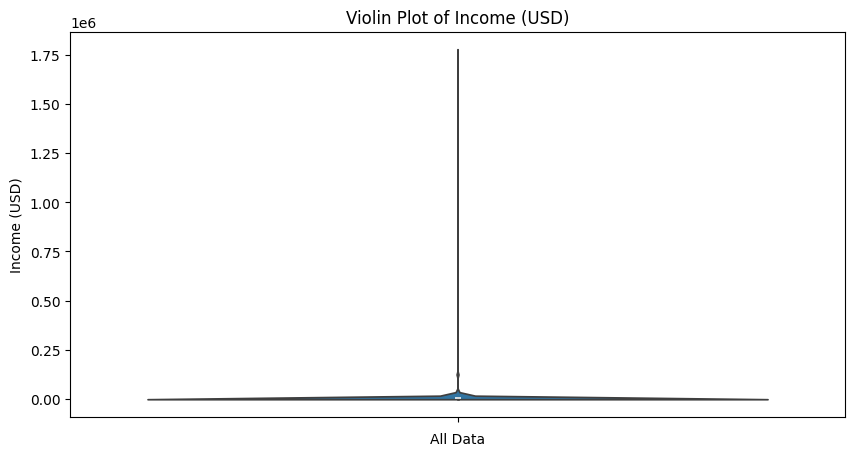

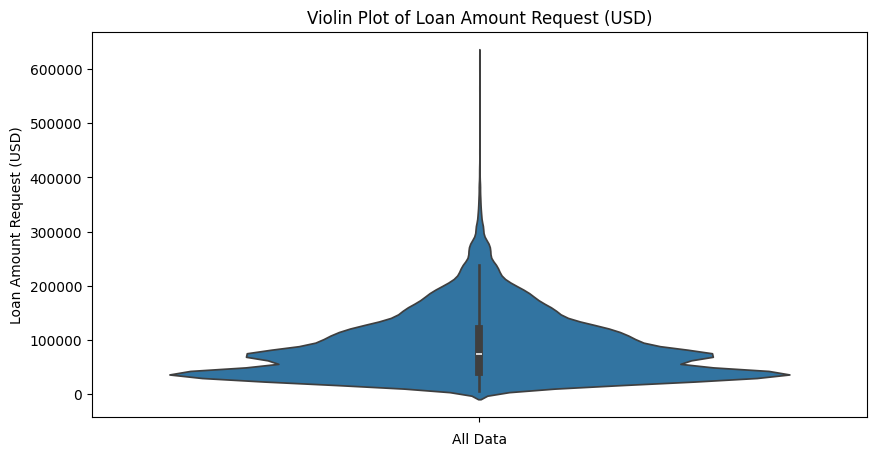

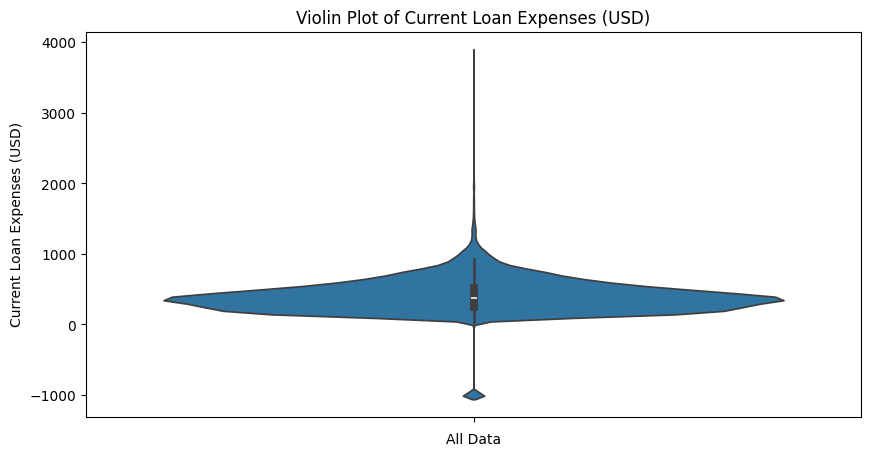

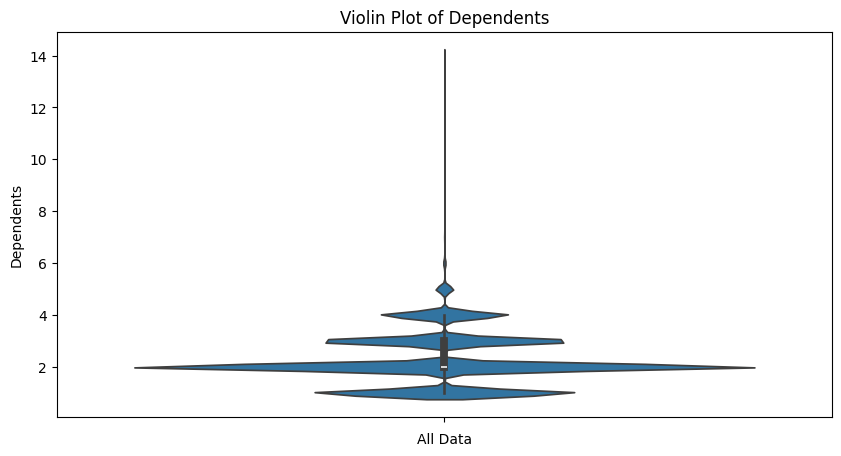

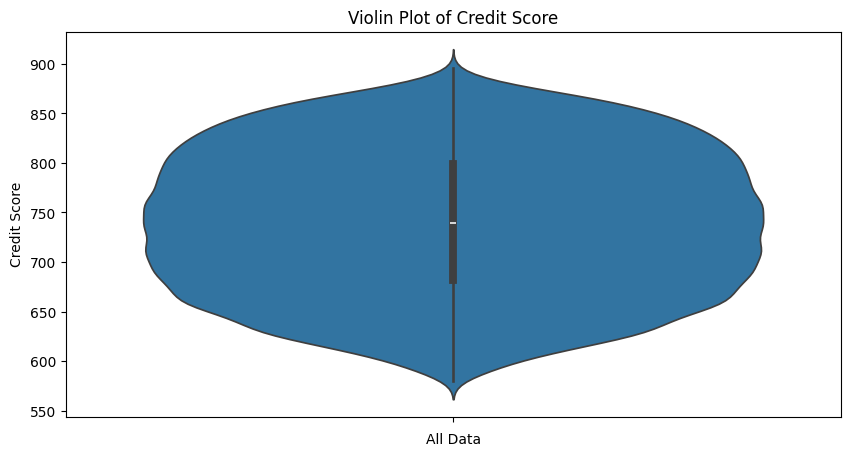

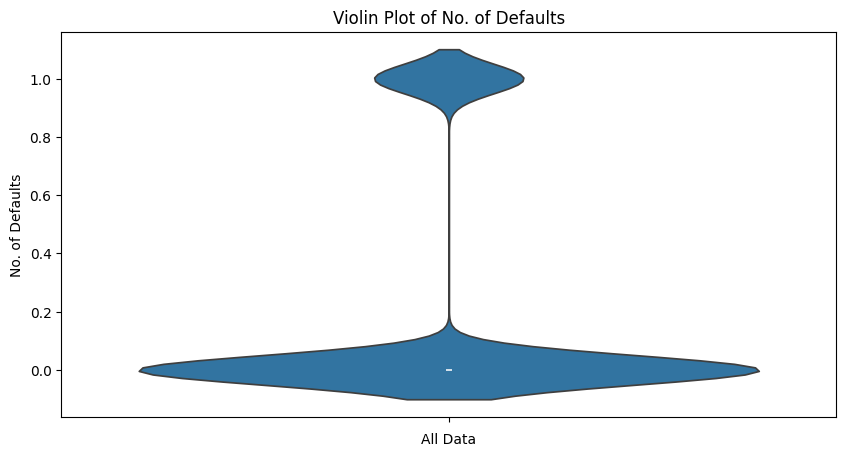

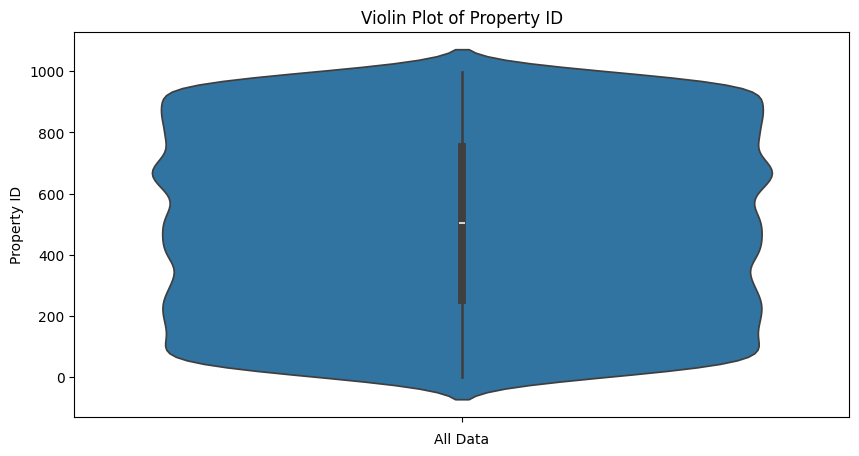

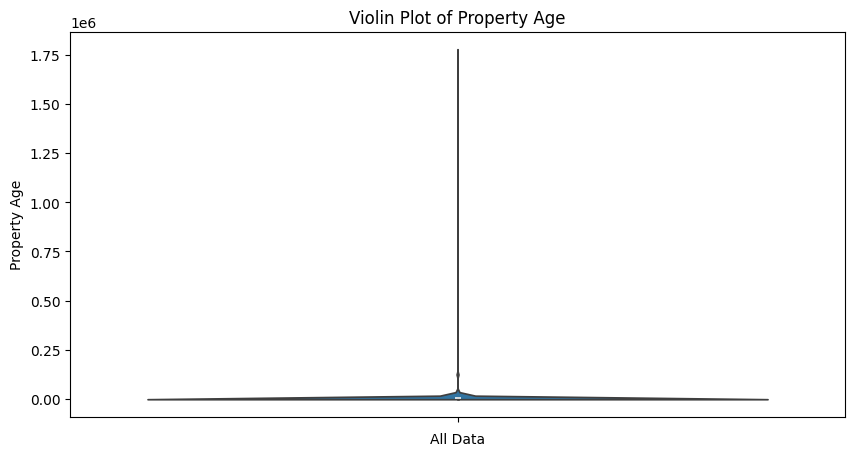

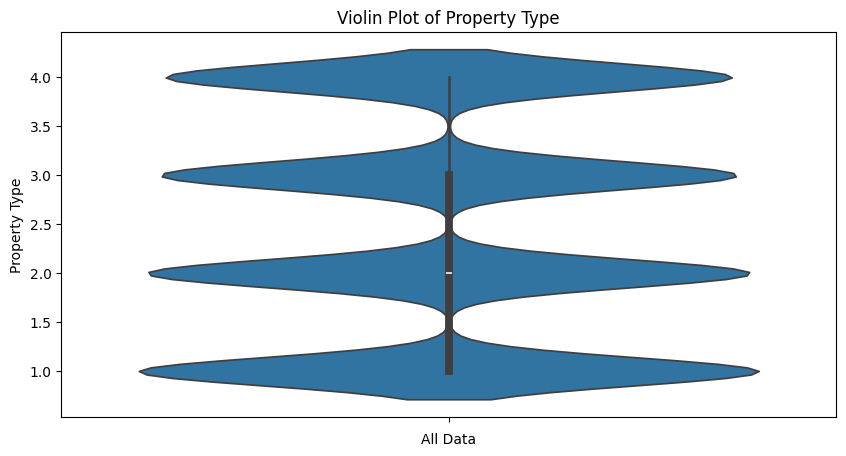

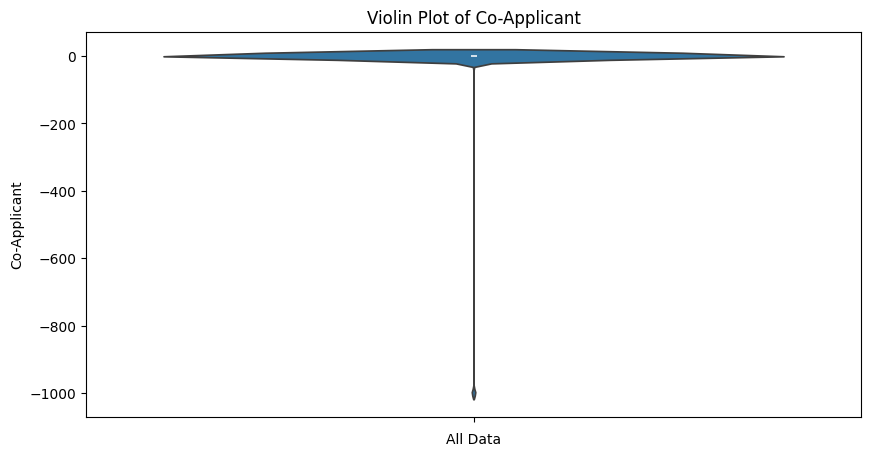

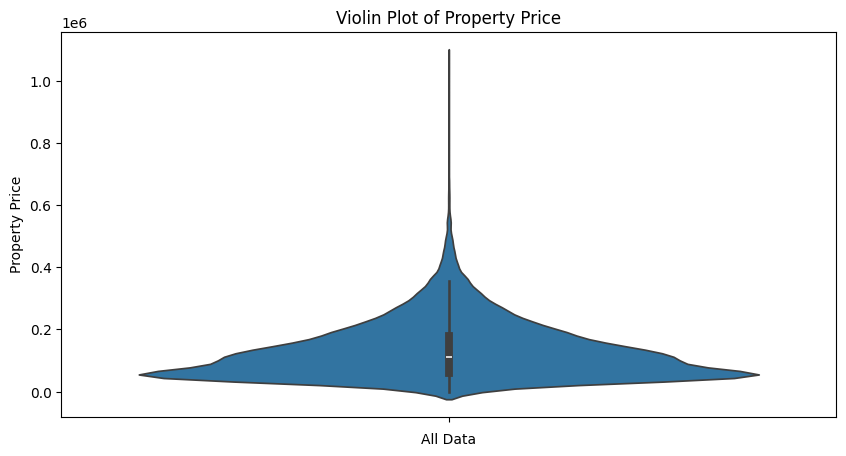

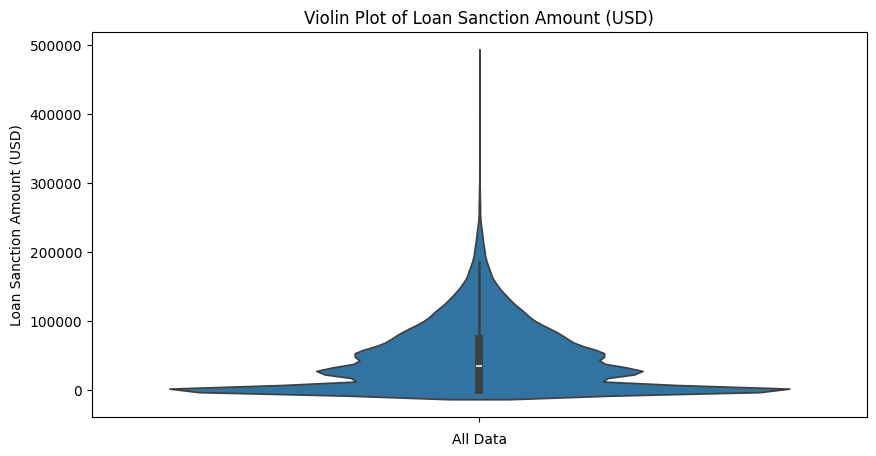

In [11]:
# Violin Plots for Numerical Data
for numerical_col in Numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(y=numerical_col, data=data)
    plt.title(f'Violin Plot of {numerical_col}')
    plt.xlabel('All Data')
    plt.ylabel(numerical_col)
    plt.show()

In [12]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Discretize numerical data into bins
for column in numerical_columns:
    data[f'{column}_binned'] = pd.qcut(data[column], q=4, duplicates='drop')

# Contingency Tables and Chi-Square Tests
binned_columns = [f'{col}_binned' for col in numerical_columns]

print("\nChi-Square Test Results:")
for i, column1 in enumerate(binned_columns):
    for column2 in binned_columns[i+1:]:
        contingency_table = pd.crosstab(data[column1], data[column2])
        if contingency_table.size == 0:
            print(f"\nContingency Table between {column1} and {column2} is empty. Skipping chi-square test.")
            continue
        print(f"\nContingency Table between {column1} and {column2}:")
        print(contingency_table)

        chi2, p, dof, ex = chi2_contingency(contingency_table)
        print(f"Chi-Square Test between {column1} and {column2}:")
        print(f"Chi2 Statistic: {chi2}, p-value: {p}")

        # Bar Plot for contingency table
        contingency_table.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f'Stacked Bar Plot of {column1} and {column2}')
        plt.xlabel(column1)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

Output hidden; open in https://colab.research.google.com to view.